# Chapter 14


In [1]:
!pip install -q scipy

# Image Processing Techniques II


## Contour Detection


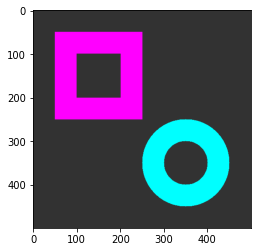

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = np.ones((500, 500, 3), dtype="uint8") * 50
# create outer square
cv.rectangle(img, (50, 50), (250, 250), (255, 0, 255), -1)
# create inner square
cv.rectangle(img, (100, 100), (200, 200), (50, 50, 50), -1)
# create outer circle
cv.circle(img, (350, 350), 100, (255, 255, 0), -1)
# create inner circle
cv.circle(img, (350, 350), 50, (50, 50, 50), -1)

cv.imwrite('square_circle.png', img)

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB) 

plt.show()

Find the Contours

detected contours (RETR_EXTERNAL): 2
detected contours (RETR_LIST): '4' 
size (RETR_EXTERNAL): 31134.0
size (RETR_EXTERNAL): 40000.0
size (RETR_LIST): 7986.0
size (RETR_LIST): 31134.0
size (RETR_LIST): 10402.0
size (RETR_LIST): 40000.0


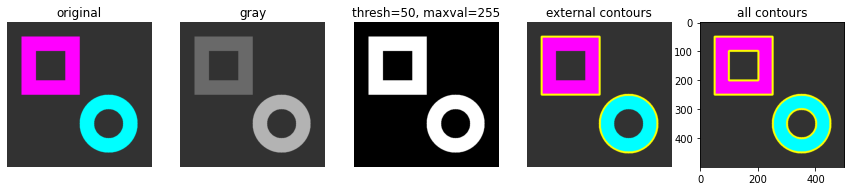

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# read or load image
img = cv.imread('square_circle.png')

plt.figure(figsize=(15,8))

# image
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(1,5,1)
plt.imshow(imgRGB)
plt.title('original')
plt.axis('off')

# BGR to gray
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# gray to RGB
imgRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
plt.subplot(1,5,2)
plt.imshow(imgRGB)
plt.title('gray')
plt.axis('off')

# threshold
thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
# gray to RGB
imgRGB = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(1,5,3)
plt.imshow(imgRGB)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

# find contours
contours, hierarchy = cv.findContours(thresh_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours for each call:
print(f"detected contours (RETR_EXTERNAL): {len(contours)}")
print("detected contours (RETR_LIST): '{}' ".format(len(all_contours)))

# draw the external contours
img_ext_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in contours:
    print(f"size (RETR_EXTERNAL): {cv.contourArea(contour)}")
    cv.drawContours(img_ext_contour, [contour], 0, color, thickness)

# BGR to RGB
imgRGB = img_ext_contour[:, :, ::-1]
plt.subplot(1,5,4)
plt.imshow(imgRGB)
plt.title('external contours')
plt.axis('off')


# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    print(f"size (RETR_LIST): {cv.contourArea(contour)}")
    cv.drawContours(img_all_contour, [contour], 0, color, thickness)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(1,5,5)
plt.imshow(imgRGB)
plt.title('all contours')

plt.show()

## Class Activity
Identify, determine the sizes and draw a white line around the inner and outer circle.


rect original [255   0 255]
rect gray 105
circle original [255 255   0]
circle gray 179
size (RETR_EXTERNAL): 40000.0


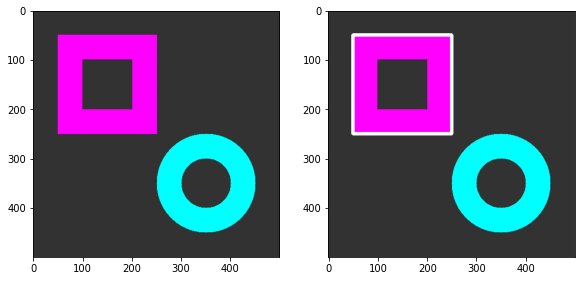

In [27]:
import cv2 as cv
import matplotlib.pyplot as plt

# read image
img = cv.imread("square_circle.png")

# convert to gray
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# pixel color @ [150,70] == (255,0,255)
print('rect original', img[150, 70])
print('rect gray', imgGray[150, 70])
print('circle original', img[400, 300])
print('circle gray', imgGray[400, 300])

# apply threshold for segmentation
thresh = 100
ret, imgThresh = cv.threshold(imgGray, thresh, 255, cv.THRESH_BINARY)

# contour detection
# find contours
contours, hierarchy = cv.findContours(imgThresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
# draw the external contours
img_ext_contour = img.copy()
color = (255, 255, 255)
thickness = 5

contour = contours[1]
# for contour in contours:
print(f"size (RETR_EXTERNAL): {cv.contourArea(contour)}")
cv.drawContours(img_ext_contour, [contour], 0, color, thickness)


# all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# plot size
plt.figure(figsize=(15,6))
# show img
plt.subplot(1,3,1)
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)

# show segmented image
# plt.subplot(1,3,2)
# imgRGB = cv.cvtColor(imgGray, cv.COLOR_GRAY2RGB)
# plt.imshow(imgRGB)

# show segmented image
plt.subplot(1,3,2)
imgRGB = cv.cvtColor(img_ext_contour, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)


# 
plt.show()



## Class Activity

Detect and draw the contours in ca[.ext].

rect original [165 186 194]
rect gray 186
circle original [123 153 170]
circle gray 155


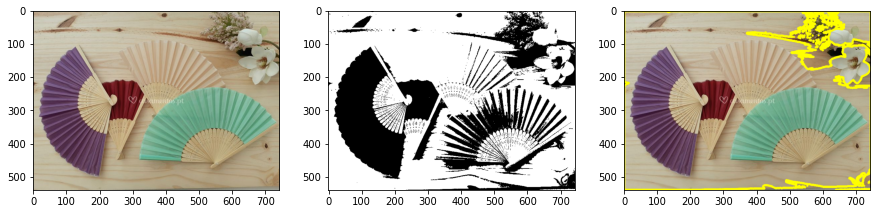

In [42]:
import cv2 as cv
import matplotlib.pyplot as plt

# read image
img = cv.imread("assets/ca.jpg")

# convert to gray
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# pixel color @ [150,70] == (255,0,255)
print('rect original', img[150, 70])
print('rect gray', imgGray[150, 70])
print('circle original', img[400, 300])
print('circle gray', imgGray[400, 300])

# apply threshold for segmentation
thresh = 150
ret, imgThresh = cv.threshold(imgGray, thresh, 255, cv.THRESH_BINARY)

# contour detection
all_contours, all_hierarchy = cv.findContours(imgThresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # print(f"size (RETR_LIST): {cv.contourArea(contour)}")
    cv.drawContours(img_all_contour, [contour], 0, color, thickness)

# plot size
plt.figure(figsize=(15,6))
# show img
plt.subplot(1,3,1)
imgRGB = img[:,:,::-1]
plt.imshow(imgRGB)

# show segmented image
plt.subplot(1,3,2)
imgRGB = cv.cvtColor(imgThresh, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)

# show segmented image
plt.subplot(1,3,3)
imgRGB = cv.cvtColor(img_all_contour, cv.COLOR_BGR2RGB)
plt.imshow(imgRGB)


# 
plt.show()




## Assignment
Identify, determine the sizes and draw a white line around the inner square and inner circle.

### Contours Compression

detected contours (RETR_LIST|CHAIN_APPROX_NONE): '4' 
contour: (284, 1, 2) (284, 2) , size:  7986.0
contour: (564, 1, 2) (564, 2) , size:  31134.0
contour: (404, 1, 2) (404, 2) , size:  10402.0
contour: (800, 1, 2) (800, 2) , size:  40000.0
detected contours (RETR_LIST|CHAIN_APPROX_SIMPLE): '4' 
contour: (148, 1, 2) (148, 2) , size:  7986.0
contour: (292, 1, 2) (292, 2) , size:  31134.0
contour: (8, 1, 2) (8, 2) , size:  10402.0
contour: (4, 1, 2) (4, 2) , size:  40000.0
detected contours (RETR_LIST|CHAIN_APPROX_TC89_KCOS): '4' 
contour: (52, 1, 2) (52, 2) , size:  8070.0
contour: (84, 1, 2) (84, 2) , size:  31330.0
contour: (4, 1, 2) (4, 2) , size:  10202.0
contour: (4, 1, 2) (4, 2) , size:  40000.0
detected contours (RETR_LIST|CHAIN_APPROX_TC89_L1): '4' 
contour: (44, 1, 2) (44, 2) , size:  8070.0
contour: (108, 1, 2) (108, 2) , size:  31314.0
contour: (4, 1, 2) (4, 2) , size:  10202.0
contour: (4, 1, 2) (4, 2) , size:  40000.0


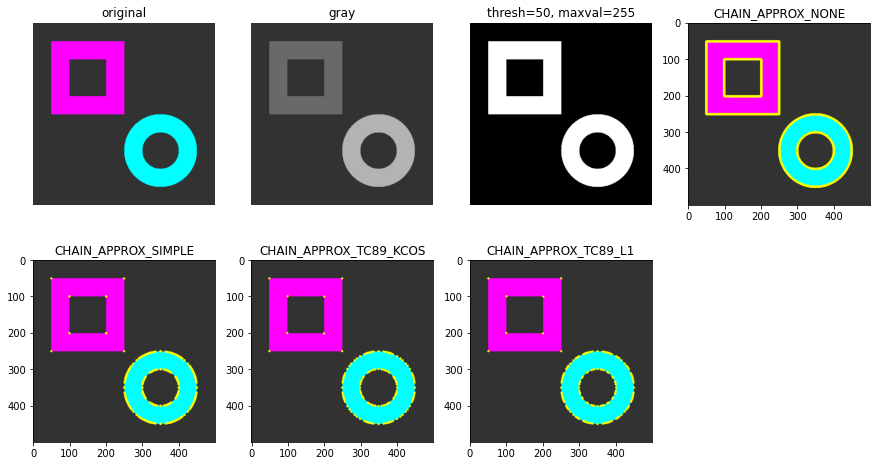

In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('square_circle.png')

plt.figure(figsize=(15,8))

# image
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(2,4,1)
plt.imshow(imgRGB)
plt.title('original')
plt.axis('off')

# BGR to gray
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray to RGB
imgRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
plt.subplot(2,4,2)
plt.imshow(imgRGB)
plt.title('gray')
plt.axis('off')

# threshold
thresh = 50
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY)
# gray to RGB
imgRGB = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(2,4,3)
plt.imshow(imgRGB)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

# find contours
# CHAIN_APPROX_NONE
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_NONE): '{}' ".format(len(all_contours)))

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    # print(squeeze.shape)
    print('contour:',contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,4)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_NONE')

# CHAIN_APPROX_SIMPLE
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_SIMPLE): '{}' ".format(len(all_contours)))

# draw the contour points
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    print('contour:',contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,5)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_SIMPLE')

# CHAIN_APPROX_TC89_KCOS
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_KCOS)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_TC89_KCOS): '{}' ".format(len(all_contours)))

# draw the contour points
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    print('contour:',contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,6)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_TC89_KCOS')

# CHAIN_APPROX_TC89_L1
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_L1)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_TC89_L1): '{}' ".format(len(all_contours)))

# draw the contour points
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    squeeze = np.squeeze(contour)
    print('contour:', contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(img_all_contour, pp, 3, color, -1)


# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,7)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_TC89_L1')


plt.show()

# Example 
Apply all the find contour types.

detected contours (RETR_LIST|CHAIN_APPROX_NONE): '1846' 
detected contours (RETR_LIST|CHAIN_APPROX_SIMPLE): '1846' 
detected contours (RETR_LIST|CHAIN_APPROX_TC89_KCOS): '1846' 
detected contours (RETR_LIST|CHAIN_APPROX_TC89_L1): '1846' 


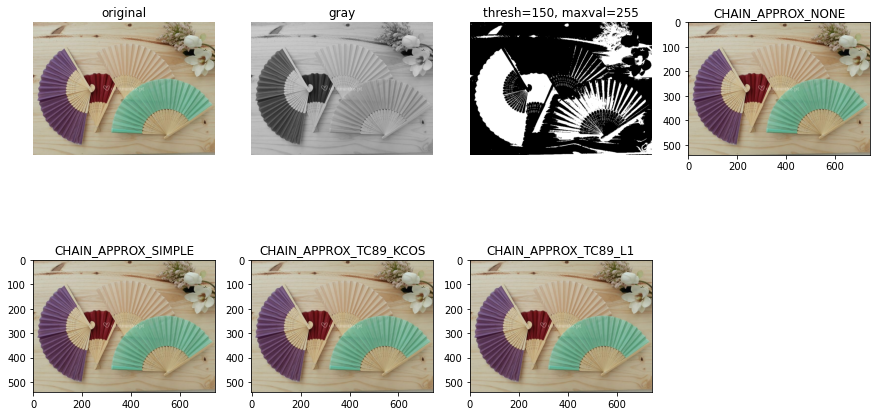

In [49]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('assets/ca.jpg')

plt.figure(figsize=(15,8))

# image
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(2,4,1)
plt.imshow(imgRGB)
plt.title('original')
plt.axis('off')

# BGR to gray
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# gray to RGB
imgRGB = cv.cvtColor(img_gray, cv.COLOR_GRAY2RGB)
plt.subplot(2,4,2)
plt.imshow(imgRGB)
plt.title('gray')
plt.axis('off')

# threshold
thresh = 150
maxval = 255
ret, thresh_img = cv.threshold(img_gray, thresh, maxval, cv.THRESH_BINARY_INV)
# gray to RGB
imgRGB = cv.cvtColor(thresh_img, cv.COLOR_GRAY2RGB)
plt.subplot(2,4,3)
plt.imshow(imgRGB)
plt.title(f'thresh={thresh}, maxval={maxval}')
plt.axis('off')

# find contours
# CHAIN_APPROX_NONE
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_NONE): '{}' ".format(len(all_contours)))

# draw the external contours
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    # print(squeeze.shape)
    # print('contour:',contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    # for p in squeeze:
    #     pp = tuple(p.reshape(1, -1)[0])
    #     cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,4)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_NONE')

# CHAIN_APPROX_SIMPLE
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_SIMPLE): '{}' ".format(len(all_contours)))

# draw the contour points
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    # print('contour:',contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    # for p in squeeze:
    #     pp = tuple(p.reshape(1, -1)[0])
    #     cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,5)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_SIMPLE')

# CHAIN_APPROX_TC89_KCOS
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_KCOS)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_TC89_KCOS): '{}' ".format(len(all_contours)))

# draw the contour points
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    # print(contour.shape)
    squeeze = np.squeeze(contour)
    # print('contour:',contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    # for p in squeeze:
    #     pp = tuple(p.reshape(1, -1)[0])
    #     cv.circle(img_all_contour, pp, 3, color, -1)

# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,6)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_TC89_KCOS')

# CHAIN_APPROX_TC89_L1
all_contours, all_hierarchy = cv.findContours(thresh_img, cv.RETR_LIST, cv.CHAIN_APPROX_TC89_L1)

# Show the number of detected contours for each call:
print("detected contours (RETR_LIST|CHAIN_APPROX_TC89_L1): '{}' ".format(len(all_contours)))

# draw the contour points
img_all_contour = img.copy()
color = (0, 255, 255)
thickness = 5
for contour in all_contours:
    # draw points
    squeeze = np.squeeze(contour)
    # print('contour:', contour.shape, squeeze.shape, ', size: ', cv.contourArea(contour))

    # for p in squeeze:
    #     pp = tuple(p.reshape(1, -1)[0])
    #     cv.circle(img_all_contour, pp, 3, color, -1)


# BGR to RGB
imgRGB = img_all_contour[:, :, ::-1]
plt.subplot(2,4,7)
plt.imshow(imgRGB)
plt.title('CHAIN_APPROX_TC89_L1')


plt.show()

### Contour Functionality

detected contours: '1' 
contour: (1928, 1, 2) , size:  ((616.2575073242188, 271.3758544921875), (389.5900573730469, 670.6177978515625), 77.82854461669922)


Text(0.5, 1.0, 'approxPolyDP')

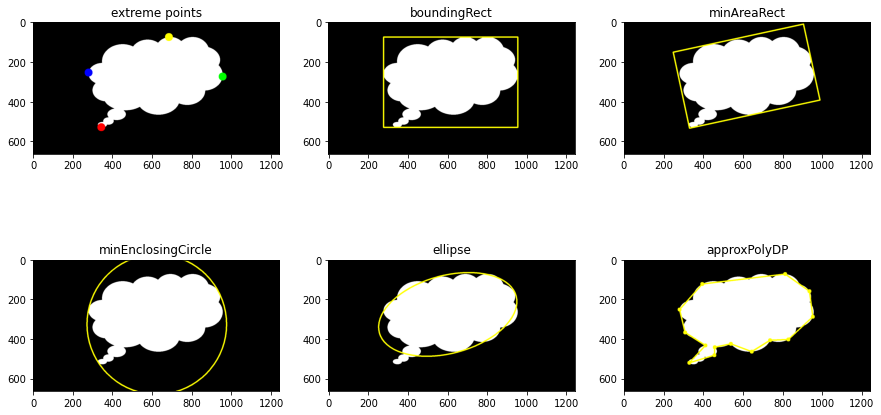

In [5]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../samples/data/shape_features.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply cv2.threshold() to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY)

# Find contours using the thresholded image:
# Note: cv2.findContours() has been changed to return only the contours and the hierarchy
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Show the number of detected contours:
print("detected contours: '{}' ".format(len(contours)))
for contour in contours:
    print('contour:', contour.shape, ', size: ', cv.minAreaRect(contour))

# Create copy of the original image to perform the visualization of each operation:
imgBoundingRect = img.copy()
imgMinAreaRect = img.copy()
imgFitEllipse = img.copy()
imgMinEnclosingCircle = img.copy()
imgApproxPolyDP = img.copy()

# boundingRect():
x, y, w, h = cv.boundingRect(contours[0])
cv.rectangle(imgBoundingRect, (x, y), (x + w, y + h), (0, 255, 255), 5)

# minAreaRect():
minAreaRect = cv.minAreaRect(contours[0])
box = cv.boxPoints(minAreaRect)
box = np.int0(box)
cv.polylines(imgMinAreaRect, [box], True, (0, 255, 255), 5)

# minEnclosingCircle():
(x, y), radius = cv.minEnclosingCircle(contours[0])
center = (int(x), int(y))
radius = int(radius)
cv.circle(imgMinEnclosingCircle, center, radius, (0, 255, 255), 5)

# fitEllipse():
ellipse = cv.fitEllipse(contours[0])
cv.ellipse(imgFitEllipse, ellipse, (0, 255, 255), 5)

# approxPolyDP():
epsilon = 0.01 * cv.arcLength(contours[0], True)
approxPolyDP = cv.approxPolyDP(contours[0], epsilon, True)
color = (0, 255, 255)
thickness = 5
for contour in [approxPolyDP]:
    cv.drawContours(imgApproxPolyDP, [contour], 0, color, thickness)
color = (0, 255, 255)
thickness = 5
for contour in [approxPolyDP]:
    # draw points
    squeeze = np.squeeze(contour)
    # print('contour:',contour.shape, squeeze.shape)
    for p in squeeze:
        pp = tuple(p.reshape(1, -1)[0])
        cv.circle(imgApproxPolyDP, pp, 10, color, -1)

# Detect extreme points of the contour:
contour = contours[0]
left = tuple(contour[contour[:, :, 0].argmin()][0])
right = tuple(contour[contour[:, :, 0].argmax()][0])
top = tuple(contour[contour[:, :, 1].argmin()][0])
bottom = tuple(contour[contour[:, :, 1].argmax()][0])
cv.circle(img, left, 20, (255, 0, 0), -1)
cv.circle(img, right, 20, (0, 255, 0), -1)
cv.circle(img, top, 20, (0, 255, 255), -1)
cv.circle(img, bottom, 20, (0, 0, 255), -1)

# Plot the image:
plt.figure(figsize=(15,8))
# BGR to RGB
imgRGB = img[:, :, ::-1]
plt.subplot(2,3,1)
plt.imshow(imgRGB)
plt.title('extreme points')

# BGR to RGB
imgRGB = imgBoundingRect[:, :, ::-1]
plt.subplot(2,3,2)
plt.imshow(imgRGB)
plt.title('boundingRect')

# BGR to RGB
imgRGB = imgMinAreaRect[:, :, ::-1]
plt.subplot(2,3,3)
plt.imshow(imgRGB)
plt.title('minAreaRect')

# BGR to RGB
imgRGB = imgMinEnclosingCircle[:, :, ::-1]
plt.subplot(2,3,4)
plt.imshow(imgRGB)
plt.title('minEnclosingCircle')

# BGR to RGB
imgRGB = imgFitEllipse[:, :, ::-1]
plt.subplot(2,3,5)
plt.imshow(imgRGB)
plt.title('ellipse')

# BGR to RGB
imgRGB = imgApproxPolyDP[:, :, ::-1]
plt.subplot(2,3,6)
plt.imshow(imgRGB)
plt.title('approxPolyDP')


## Class Activity

Draw bounding rectangle and min Enclosing circle for the objects in the square|_circle.png

## Class Activity

1. Create image filled with 2 circles, 2 squares, 1 rectangle, 1 pentagon, 2 hexagon. Draw minimum enclosing circle round each object.
2. Find an image online full of shapes then draw minimum enclosing circle round each objects.


## Filtering Contours


We are going to sort, identify and recognize shapes. 

detected contours: 10


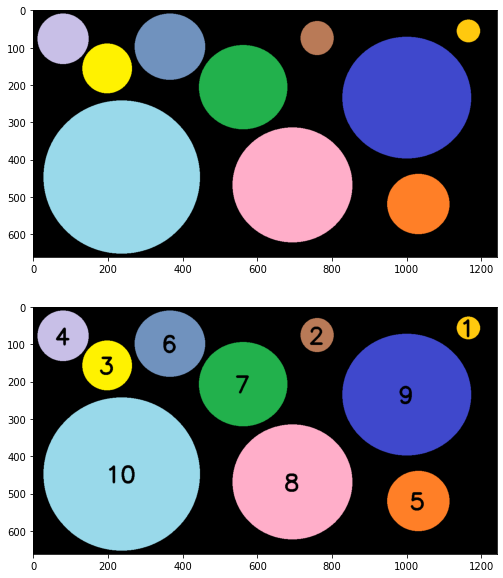

In [54]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../samples/data/shapes_sizes.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)

plt.figure(figsize=(10,10))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(211)
plt.imshow(imgRGB)

for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = str(i + 1)
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 2
    thickness = 5
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(img, text, (text_x, text_y), fontFace, fontScale, color, thickness)

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(212)
plt.imshow(imgRGB)

plt.show()

### Using enumerate

In [51]:
alist = ['inamul', 'azureen', 'doct', 'nasi', 'xyzan']

count = 1
for n in alist:
    print(count, n)
    count +=1

1 inamul
2 azureen
3 doct
4 nasi
5 xyzan


In [53]:
alist = ['inamul', 'azureen', 'doct', 'nasi', 'xyzan']

for i,n in enumerate(alist):
    print(i+1, n)

1 inamul
2 azureen
3 doct
4 nasi
5 xyzan


## Class Activity

Sort the shapes image you created.

detected contours: 0


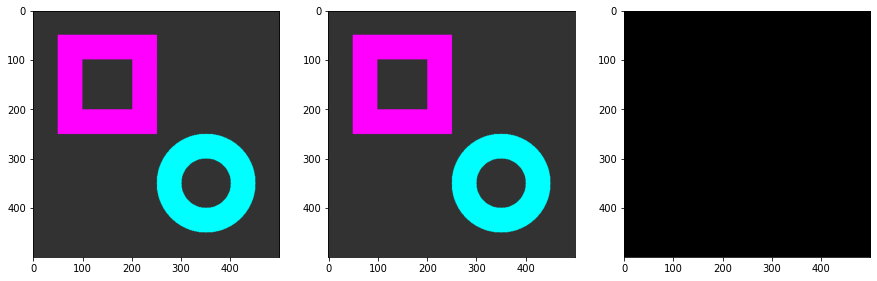

In [74]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("square_circle.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 250, 255, cv.THRESH_BINARY)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]
# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list)
# (contour_sizes, contours) = zip(*sorted_size_shape_list)

for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = str(i + 1)
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 2
    thickness = 5
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 255, 0)
    cv.putText(img, text, (text_x, text_y), fontFace, fontScale, color, thickness)


plt.figure(figsize=(15,15))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(131)
plt.imshow(imgRGB)

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(132)
plt.imshow(imgRGB)


imgRGB = cv.cvtColor(threshImg, cv.COLOR_GRAY2RGB)
plt.subplot(133)
plt.imshow(imgRGB)

plt.show()

## Identifying Shapes

detected contours: 6
contour: (4, 1, 2) (4, 2)
2.117948717948718
contour: (5, 1, 2) (5, 2)
contour: (6, 1, 2) (6, 2)
contour: (8, 1, 2) (8, 2)
contour: (3, 1, 2) (3, 2)
contour: (4, 1, 2) (4, 2)
1.0861244019138756


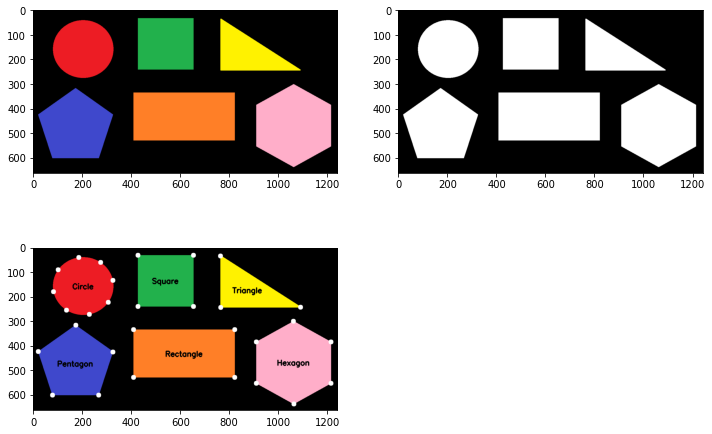

In [76]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../samples/data/shapes.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.imshow(imgRGB)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY)

# gray to RGB
imgRGB = cv.cvtColor(threshImg, cv.COLOR_GRAY2RGB)
plt.subplot(222)
plt.imshow(imgRGB)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}")

# approxPolyDP():
imgApproxPolyDP = img.copy()
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.03 * perimeter
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)
    
    color = (0, 255, 255)
    thickness = 5
    # draw line
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color, thickness)
        
    color = (255, 255, 255)
    thickness = 5
    # draw points
    for approx in [approxPolyDP]:
        # draw points
        squeeze = np.squeeze(approx)
        print('contour:',approx.shape, squeeze.shape)
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color, -1)


    # determine shape   
    verticeNumber = len(approxPolyDP)
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')
    else:
        vertice_shape = (verticeNumber, 'Circle')
    
    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = vertice_shape[1]
    fontFace = cv.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (0, 0, 0)
    cv.putText(imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness)




# BGR to RGB
imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(223)
plt.imshow(imgRGB)

plt.show()

# Assignment

1. Create shape in external drawing apps. 
2. Write a code to identify your shapes
3. Write a code to sort your shapes.

## Matching Contour

contours: 16
circle contours: 16


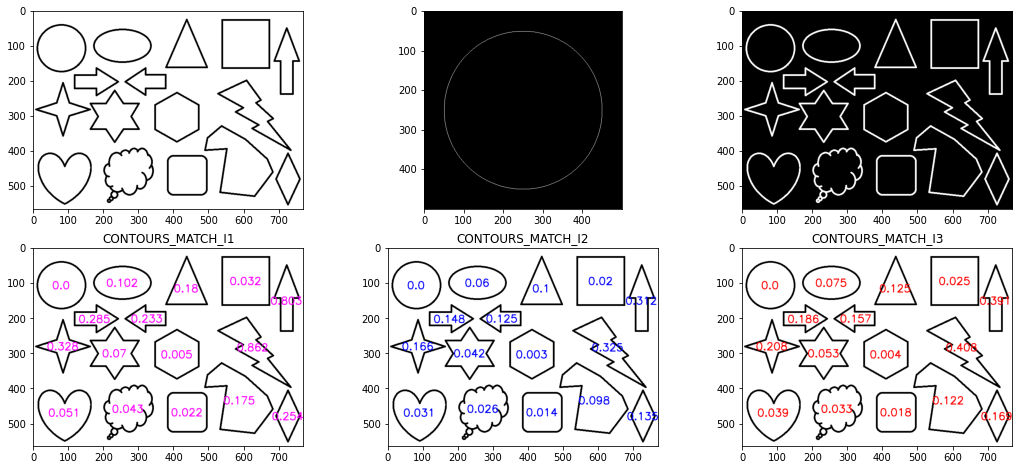

In [8]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("../samples/data/match_shapes.png")
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

imgCircle = np.zeros((500, 500, 3), dtype="uint8")
cv.circle(imgCircle, (250, 250), 200, (255, 255, 255), 1)
imgCircleGray = cv.cvtColor(imgCircle, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(18,8))

# BGR to RGB
imgRGB = img[:,:,::-1]
plt.subplot(231)
plt.imshow(imgRGB)

# BGR to RGB
imgRGB = imgCircle[:,:,::-1]
plt.subplot(232)
plt.imshow(imgRGB)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 50, 255, cv.THRESH_BINARY_INV)
ret, threshImgCircle = cv.threshold(imgCircleGray, 50, 255, cv.THRESH_BINARY)

# gray to RGB
imgRGB = cv.cvtColor(threshImg, cv.COLOR_GRAY2RGB)
plt.subplot(233)
plt.imshow(imgRGB)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)
contoursCircle, hierarchyCircle = cv.findContours(threshImgCircle, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"contours: {len(contours)}")
print(f"circle contours: {len(contours)}")

# match
# match methods dictionary
matchMethods = {'CONTOURS_MATCH_I1': cv.CONTOURS_MATCH_I1, 'CONTOURS_MATCH_I2': cv.CONTOURS_MATCH_I2, 'CONTOURS_MATCH_I3': cv.CONTOURS_MATCH_I3}
colors = [(255,0,255), (255,0,0), (0,0,255)]
k = 4
for i, (key,method) in enumerate(matchMethods.items()):
    imgMatch = img.copy()
    for contour in contours:
        # write in contour
        # Compute the moment of contour:
        M = cv.moments(contour)

        # The center or centroid can be calculated as follows:
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])

        
        matchValue = cv.matchShapes(contoursCircle[0], contour, method, 0.0)

        # Get the position to draw:    
        text = str(round(matchValue,3))
        fontFace = cv.FONT_HERSHEY_SIMPLEX
        fontScale = 1
        thickness = 2
        text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

        text_x = cX - text_size[0] / 2
        text_x = round(text_x)
        text_y = cY + text_size[1] / 2
        text_y = round(text_y)
        
        # Write the ordering of the shape on the center of shapes
        color = colors[i]
        cv.putText(imgMatch, text, (text_x, text_y), fontFace, fontScale, color, thickness)

    # BGR to RGB
    imgRGB = imgMatch[:,:,::-1]
    plt.subplot(2,3,k)
    plt.title(key)
    plt.imshow(imgRGB)
    k += 1


plt.show()

## Class Activity
Fill the matched contour with color Green